In [8]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import WEEKLY,MONTHLY, DateFormatter, rrulewrapper, RRuleLocator 
import numpy as np
  
 
def _create_date(datetxt):
    """Creates the date"""
    day,month,year=datetxt.split('-')
    date = dt.datetime(int(year), int(month), int(day))
    mdate = matplotlib.dates.date2num(date) 
    return mdate
 
def CreateGanttChart(fname):
    """
        Create gantt charts with matplotlib
        Give file name.
    """ 
    ylabels = []
    customDates = []
    try:
        textlist=open(fname).readlines()
    except:
        return
#
    for tx in textlist:
        if not tx.startswith('#'):
            ylabel,startdate,enddate=tx.split(',')
            ylabels.append(ylabel.replace('\n',''))
            customDates.append([_create_date(startdate.replace('\n','')),_create_date(enddate.replace('\n',''))])
             
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    task_dates = {}
    for i,task in enumerate(ylabels):
        task_dates[task] = customDates[i]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    for i in range(len(ylabels)):
         start_date,end_date = task_dates[ylabels[i]]
         ax.barh((i*0.5)+0.5, end_date - start_date, left=start_date, height=0.3, align='center', edgecolor='lightgreen', color='orange', alpha = 0.8)
    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 14)
#    ax.axis('tight')
    ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
    ax.grid(color = 'g', linestyle = ':')
    ax.xaxis_date()
    rule = rrulewrapper(WEEKLY, interval=1)
    loc = RRuleLocator(rule)
    #formatter = DateFormatter("%d-%b '%y")
    formatter = DateFormatter("%d-%b")
  
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    labelsx = ax.get_xticklabels()
    plt.setp(labelsx, rotation=30, fontsize=10)
 
    font = font_manager.FontProperties(size='small')
    ax.legend(loc=1,prop=font)
 
    ax.invert_yaxis()
    fig.autofmt_xdate()
    plt.savefig('gantt.svg')
    plt.show()
 
if __name__ == '__main__':
    fname=r"projectChart.txt"
    CreateGanttChart(fname)

No handles with labels found to put in legend.


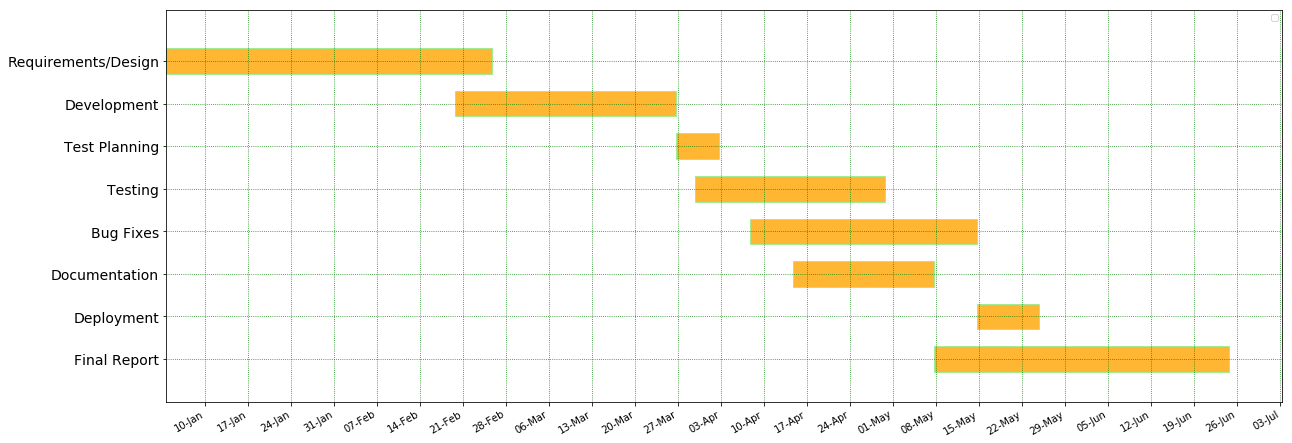

In [11]:
CreateGanttChart('test.txt')